Each batch in the CIFAR-10 dataset is conveniently formatted as a $10000\times 3072$ numpy array, where each row represents a $32\times 32$ image. The first 1024 entries represent red values, the next 1024 green values, and the last 1024 blue values. Each of these 1024 entries are sorted in row-first order.

Let's unpickle each of the five training batch files.

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
batches = [unpickle("/Users/markkikta/Downloads/cifar-10-batches-py/data_batch_1"),
          unpickle("/Users/markkikta/Downloads/cifar-10-batches-py/data_batch_2"),
          unpickle("/Users/markkikta/Downloads/cifar-10-batches-py/data_batch_3"),
          unpickle("/Users/markkikta/Downloads/cifar-10-batches-py/data_batch_4"),
          unpickle("/Users/markkikta/Downloads/cifar-10-batches-py/data_batch_5")]

Now we convert each of these dicts into pandas DataFrames. 

First, we make DataFrames of the image data.

In [3]:
import pandas as pd

dfs = []
for batch in batches:
    dfs.append(pd.DataFrame(batch[b'data']))

Now, let's add the labels.

In [4]:
for i in range(5):
    dfs[i]['Labels'] = batches[i][b'labels']

In [5]:
dfs[0].head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Labels
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


We'll take a count of how many images of each class are present in each batch, and plot bar graphs of these counts.

In [6]:
class_counts = []
for df in dfs:
    class_counts.append(df['Labels'].value_counts().to_dict())

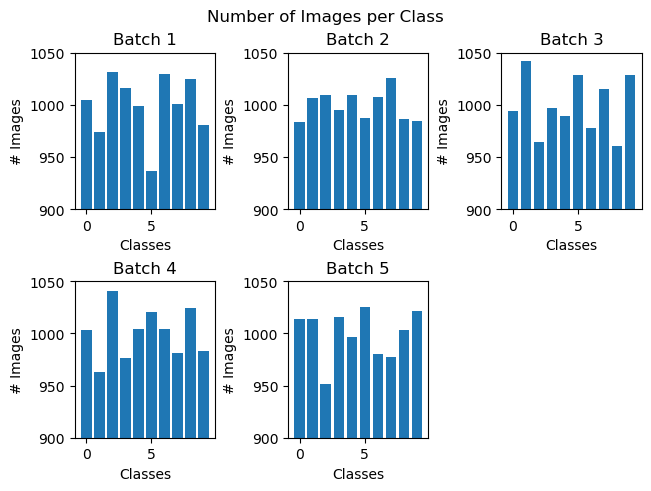

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, constrained_layout = True)
fig.suptitle("Number of Images per Class")

for i in range(5):
    fig = axs[i // 3, i % 3]
    fig.bar(class_counts[i].keys(), class_counts[i].values())
    fig.set_title('Batch ' + str(i + 1))
    fig.set_ylim([900,1050])
    fig.set_xlabel('Classes')
    fig.set_ylabel('# Images')
    
axs[1,2].axis('off')
plt.show()

Let's take a look at a couple random images from each batch.

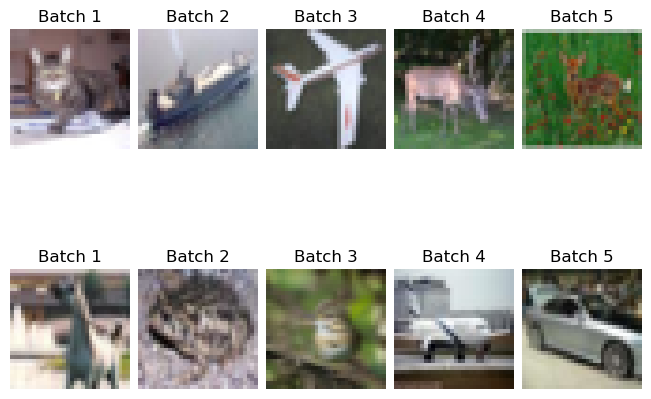

In [8]:
import numpy as np

def get_random(df):
    img = df.sample().to_numpy()
    img = np.delete(img, -1)
    img = img.reshape(3, 1024).T.reshape(32,32, 3)
    return img
    
fig, axs = plt.subplots(2, 5, constrained_layout = True)

for i in range(5):
    axs[0,i].imshow(get_random(dfs[i]))
    axs[0,i].set_title('Batch ' + str(i + 1))
    axs[0,i].axis('off')
    axs[1,i].imshow(get_random(dfs[i]))
    axs[1,i].set_title('Batch ' + str(i + 1))
    axs[1,i].axis('off')
    
plt.show()

Lastly, let's look at the average image of each class from batch 1.

In [9]:
def average_image (classNo, fig):
    mean_img = dfs[0].loc[dfs[0]['Labels'] == classNo].drop('Labels', axis = 1)
    mean_img = mean_img.to_numpy()
    mean_img = np.mean(mean_img, axis = 0)
    mean_img = mean_img.reshape(3, 1024).T.reshape(32,32, 3)
    mean_img = mean_img.astype(int)
    fig.set_title('Class ' + str(classNo))
    fig.axis('off')
    imgplot = fig.imshow(mean_img)

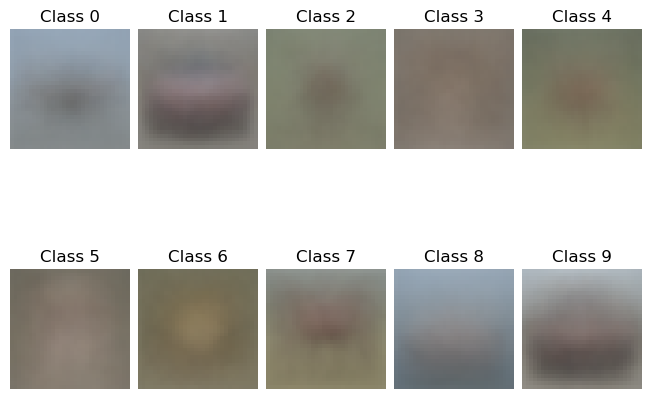

In [10]:
fig, axs = plt.subplots(2, 5, constrained_layout = True)

for i in range(10):
    average_image(i, axs[i // 5, i % 5])